# Project Week 1 - Gapminder

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import imageio
import altair as alt


## Read files

In [2]:
# Continents Dataset
continents_path = 'data/continents.csv'
continents = pd.read_csv(continents_path, sep=';', index_col='country')

# Life_expactancy Dataset
life_exp_path = 'data/gapminder_lifeexpectancy.xlsx'
life_exp = pd.read_excel(life_exp_path, index_col=0)

# Population Dataset
pop_path = 'data/gapminder_population.xlsx'
pop = pd.read_excel(pop_path, index_col=0)

# Total_Fertility Dataset
tot_fert_path = 'data/gapminder_total_fertility.csv'
tot_fert = pd.read_csv(tot_fert_path, sep=',', index_col=0)

## Data overview

In [3]:
# Continents
continents.head()

,continent
country,
Algeria,Africa
Angola,Africa
Benin,Africa
Botswana,Africa
Burkina,Africa


In [4]:
# Life expectancy
life_exp.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Life expectancy,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [5]:
# Population
pop.head()

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total population,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,4710171.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,410445.0,423591.0,438671.0,457234.0,478227.0,506889.0,552800.0,610036.0,672544.0,741688.0,...,3050741.0,3010849.0,2968026.0,2929886.0,2901883.0,2886010.0,2880667.0,2883281.0,2889676.0,2896679.0
Algeria,2503218.0,2595056.0,2713079.0,2880355.0,3082721.0,3299305.0,3536468.0,3811028.0,4143163.0,4525691.0,...,33749328.0,34261971.0,34811059.0,35401790.0,36036159.0,36717132.0,37439427.0,38186135.0,38934334.0,39666519.0


In [6]:
# Total_Fertility
tot_fert.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total fertility rate,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.70,6.46,6.20,5.93,5.66,5.40,5.14,4.90,4.68,4.47
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.85,1.80,1.76,1.74,1.74,1.75,1.76,1.77,1.78,1.78
Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.58,2.66,2.73,2.78,2.82,2.83,2.82,2.80,2.76,2.71


In [7]:
# Shapes 
print(continents.shape)
print(life_exp.shape)
print(pop.shape)
print(tot_fert.shape)

(194, 1)
(260, 217)
(275, 81)
(260, 216)


In [8]:
# Check datatypes
print(life_exp.columns.dtype)
print(pop.columns.dtype)
print(tot_fert.columns.dtype)

int64
int64
object


## Data Wrangling

In [9]:
'''convert fertility columns in integer to have 
consistent data types between different dataframes'''

tot_fert.columns = tot_fert.columns.astype(int)

### Check and remove missing values 

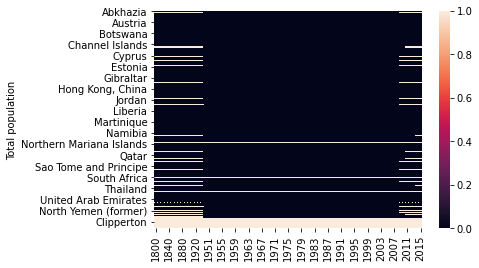

In [10]:
# Display missing values
sns.heatmap(pop.isna())

In [11]:
# Drop all rows with only NaN values 
life_exp.dropna(how='all', inplace=True)
tot_fert.dropna(how='all', inplace=True)
pop.dropna(how='all', inplace=True)

In [12]:
# check Shapes again 
print(continents.shape)
print(life_exp.shape)
print(pop.shape)
print(tot_fert.shape)

(194, 1)
(210, 217)
(256, 81)
(201, 216)


### Transform the dataframe to long format 

In [13]:
# convert dataframe so that each row contains country, year and the value of df
def melt_df(df):
    if df.index.name != 'country':
        new_df = df.copy()
        dataset_name = new_df.index.name
        new_df.index.name = 'country'
        new_df.reset_index(inplace = True)
        new_df = new_df.melt(id_vars='country', var_name='year', value_name=dataset_name)
    else:
        None
    return new_df

In [14]:
life_exp = melt_df(life_exp)
tot_fert = melt_df(tot_fert)
pop = melt_df(pop)

In [15]:
life_exp.head()

,country,year,Life expectancy
0,Afghanistan,1800,28.21
1,Albania,1800,35.40
2,Algeria,1800,28.82
3,American Samoa,1800,NaN
4,Andorra,1800,NaN


In [16]:
tot_fert.head()

,country,year,Total fertility rate
0,Afghanistan,1800,7.00
1,Albania,1800,4.60
2,Algeria,1800,6.99
3,Angola,1800,6.93
4,Antigua and Barbuda,1800,5.00


In [17]:
pop.head()

,country,year,Total population
0,Afghanistan,1800,3280000.0
1,Akrotiri and Dhekelia,1800,NaN
2,Albania,1800,410445.0
3,Algeria,1800,2503218.0
4,American Samoa,1800,8170.0


### Merge Dataframe

- merge Dataframes (fertility, life expectancy, population) based on 'country column' of life expectancy

In [18]:
life_fert_pop = life_exp.merge(tot_fert, how='left', on=['country', 'year']) \
                            .merge(pop, how='left', on=['country', 'year']) 


In [19]:
life_fert_pop.head()

,country,year,Life expectancy,Total fertility rate,Total population
0,Afghanistan,1800,28.21,7.00,3280000.0
1,Albania,1800,35.40,4.60,410445.0
2,Algeria,1800,28.82,6.99,2503218.0
3,American Samoa,1800,NaN,NaN,8170.0
4,Andorra,1800,NaN,NaN,2654.0


- merge Dataframe (fertility + life expectancy + population) based on 'country column' with continents dataframe

In [20]:
life_fert_pop_conti = life_fert_pop.merge(continents, how='inner', on='country')

In [21]:
life_fert_pop_conti.tail()

,country,year,Life expectancy,Total fertility rate,Total population,continent
36885,South Sudan,2012,56.0,NaN,10980623.0,Africa
36886,South Sudan,2013,56.0,NaN,11453810.0,Africa
36887,South Sudan,2014,56.1,NaN,11911184.0,Africa
36888,South Sudan,2015,56.1,NaN,12339812.0,Africa
36889,South Sudan,2016,56.1,NaN,NaN,Africa


## Visualisation

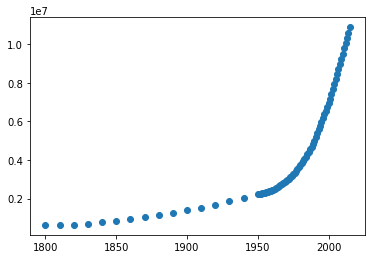

In [22]:
# check for missing values in population data for one country
mask = life_fert_pop_conti['country'] == 'Benin'
df_subset = life_fert_pop_conti.loc[mask]
plt.scatter(data=df_subset, x='year', y='Total population')

### Single plot of life expectancy vs fertility 

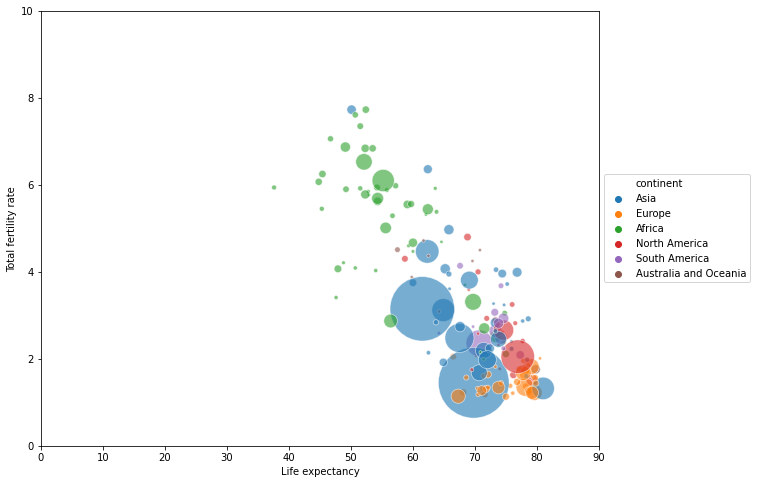

In [23]:
# create a static plot for testing & astectics issues
mask = life_fert_pop_conti['year'] == 2000
plt.figure(figsize=(10, 8))
plot = sns.scatterplot(x='Life expectancy', y='Total fertility rate', size=(life_fert_pop_conti[mask]['Total population']), 
                sizes=(10,5000),hue='continent', data=life_fert_pop_conti[mask], alpha=0.6)
plt.axis(xmin=0, xmax=90, ymin = 0, ymax = 10)
h,l = plot.get_legend_handles_labels()
plt.legend(h[0:7],l[0:7], bbox_to_anchor=(1, 0.5), loc='center left')
#plt.legend(h[0:7],l[0:7], bbox_to_anchor=(1.01, 1), borderaxespad=0, loc=2)
#plt.legend(list(life_fert_pop_conti['continent'].unique()),loc='center left', bbox_to_anchor=(1, 0.5), prop={'size':'large'}, markerscale=1)

In [24]:
# Create a subset of the dataframe removing years with missing values in population
df_subset = life_fert_pop_conti.loc[life_fert_pop_conti['Total population'].isna() == False]

### Creating all images files for year 1800 to 2016 of life expectancy vs fertility

In [25]:
for year in df_subset['year'].unique():
    mask = df_subset['year'] == year
    plt.figure(figsize=(12, 8))
    plot = sns.scatterplot(x='Life expectancy', y='Total fertility rate', 
                    size=(df_subset[mask]['Total population']), 
                sizes=(50,5000),hue='continent', 
                    data=df_subset[mask ], alpha=0.6)
    plt.axis(xmin=0, xmax=90, ymin = 0, ymax = 10)
    plt.xlabel('Life expectancy [years]')
    plt.ylabel('Fertility rate [children per women]')
    plt.title(str(year))
    h,l = plot.get_legend_handles_labels()
    plt.legend(h[0:7],l[0:7], bbox_to_anchor=(1, 0.5), loc='center left')
    plt.tight_layout()
    plt.savefig(f'fig/fert_life_{year}.png')
    plt.close()

### Create the animation out all the images files

In [26]:
import imageio

images = []

for i in df_subset['year'].unique():
    filename = f'fig/fert_life_{i}.png'
    images.append(imageio.imread(filename))

imageio.mimsave('fig/output.gif', images, fps=10)

https://github.com/Calysto/octave_kernel/issues/105

![plot](fig/output.gif)

### Create an interactive visualisation with Altair 

In [27]:
#https://altair-viz.github.io/index.html
# https://www.datacamp.com/community/tutorials/altair-in-python
#https://altair-viz.github.io/user_guide/customization.html#adjusting-chart-size

# For large datasets with > 5000 rows
alt.data_transformers.disable_max_rows()

# Creates the slider
select_year = alt.selection_single(
    name='Select', fields=['year'], init={'year': 1950},
    bind=alt.binding_range(min=1950, max=2010, step=1)
)

# Creates the chart itself as scatter plot
chart = alt.Chart(df_subset).mark_point(filled=True).encode(
    # X-Axis
    alt.X('Life expectancy', title='Life expectancy [years]', 
          scale=alt.Scale(domain=(0, 90))), 
    # Y-Axis
    alt.Y('Total fertility rate', title='Fertility rate [children per women]', 
          scale=alt.Scale(domain=(0, 10))),
    # Circle Size
    alt.Size('Total population'),
    # Colour of circle
    alt.Color('continent'),
    # Opacity of the circle
    alt.OpacityValue(0.7),
    # Show for each circle - country name, fertility rate, etc. if hover over
    tooltip = [alt.Tooltip('country:N'),
               alt.Tooltip('Total fertility rate:Q'),
               alt.Tooltip('Life expectancy:Q'),
               alt.Tooltip('Total population:Q')
              ]
    # add the slider
).add_selection(select_year
).transform_filter(select_year
  # chart size                 
).properties(
    width=600,
    height=500
)

# change circle size
chart.configure_scale(maxSize=5000)

alt.Chart(...)